In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chi2

**Loadind dataset**

In [4]:
student = pd.read_csv("../input/dataset/student-mat.csv", sep=";")
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


**Checking the info the dataset**

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Checking for missing data**

In [6]:
student.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The table above shows that there is no outliers in our variales because there is no much difference between the 25, 50, 75 percentiles. 

**Chi-Square Statement of Hypothesis**

Chi-square is use to check for the relationship between variables

H0: There is statistical significance between the dependent and independent variables

H1: There is no statistical significance between dependent variable and independent variable

In [12]:
table = student[['G1', 'G2', 'G3']]

In [13]:
stat, p, dof, expected = chi2_contingency(table)

print(expected)
# interpret test-statistic
p_value = 0.95
critical = chi2.ppf(p_value, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (p_value, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - p_value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[ 5.78846306  5.68502568  5.52651126]
 [ 5.44796523  5.35061241  5.20142236]
 [ 8.51244567  8.36033188  8.12722244]
 ...
 [ 8.51244567  8.36033188  8.12722244]
 [11.23642829 11.03563809 10.72793362]
 [ 8.8529435   8.69474516  8.45231134]]
probability=0.950, critical=854.416, stat=434.637
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)


From the above result we can see that the variables in the table all have relationship with the dependent variables. In that we reject the alternative hypothesis and accept the null hypothesis which mean there is a statistical significance between the dependent and the independent variables.

In [14]:
#perform two-way ANOVA
model = ols('G3 ~ C(G2) + C(G1) + C(G2):C(G1)',data=student).fit()
sm.stats.anova_lm(model, typ=2)

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 256, but rank is 82
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(G2),4.132036e-10,16.0,6.362957e-12,1.000000e+00
C(G1),6.071564e-08,16.0,9.349652e-10,1.000000e+00
C(G2):C(G1),1.678423e+04,256.0,1.615386e+01,2.027464e-73
Residual,1.229781e+03,303.0,NaN,NaN


**Result Intepretation**

The Anova test above shows that performance in the the First and Second term has effect on promotion exams G3 in mathematics

<AxesSubplot:>

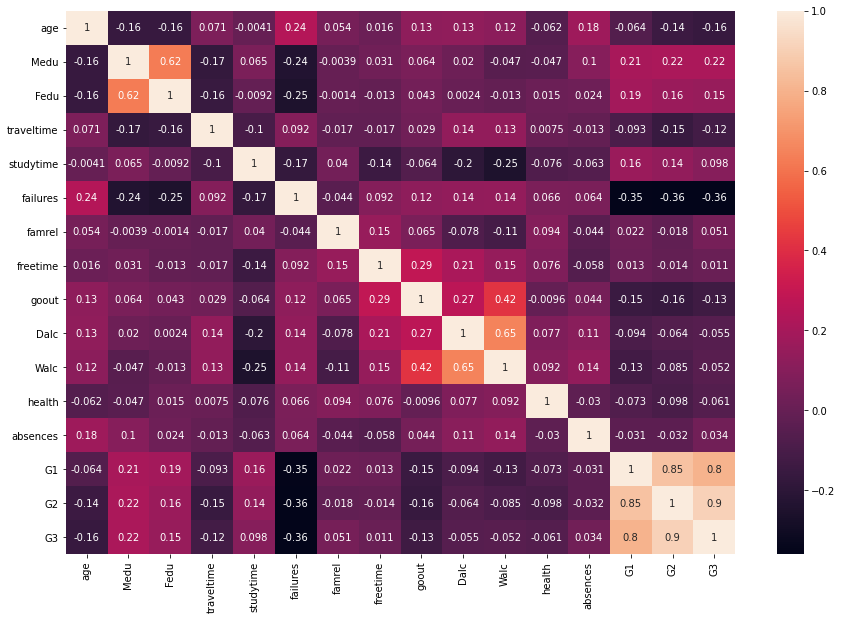

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(student.corr(), annot=True)

**Conclusion**

We can conclude that for a student to get promotion into the next class it depends on it First and Second term performance which practically really on some factors such as Medu, Fedu, studytime, famrel, and number of absence from class.